<a href="https://colab.research.google.com/github/flex-akin/hamoye_capston_cnn/blob/main/NASNetLarge_0_64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/hassan-ademola/Hamoye_capstone_project_smote/blob/main/Deep%20learning/efficientnetb7_0.998/efficientnetb7_0.998.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [5]:
# necessary imports
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

# for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [6]:
# define file paths
! git clone https://github.com/hassan-ademola/Hamoye_capstone_project_smote.git
train_path = 'Hamoye_capstone_project_smote/Data/train/'
val_path = 'Hamoye_capstone_project_smote/Data/val/'
test_path = 'Hamoye_capstone_project_smote/Data/test/'

Cloning into 'Hamoye_capstone_project_smote'...
remote: Enumerating objects: 10828, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 10828 (delta 19), reused 41 (delta 8), pack-reused 10768
Receiving objects: 100% (10828/10828), 360.62 MiB | 36.49 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Checking out files: 100% (10810/10810), done.


In [28]:
# generate train and test sets from directories
train_ds = image_dataset_from_directory(train_path,label_mode='categorical',
                                        image_size=(331, 331))
val_ds = image_dataset_from_directory(val_path,label_mode='categorical',
                                      image_size=(331, 331))
test_ds = image_dataset_from_directory(test_path,label_mode='categorical',
                                       shuffle=False,image_size=(331, 331))

Found 7556 files belonging to 4 classes.
Found 2160 files belonging to 4 classes.
Found 1084 files belonging to 4 classes.


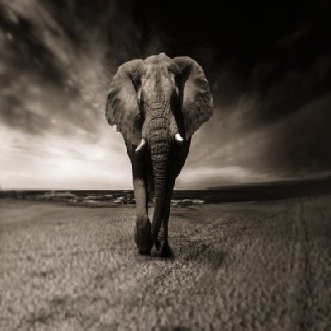

In [8]:
# load a sample image
from tensorflow.keras.preprocessing import image

img_path = train_path+'Elephant/Elephant_300.jpg'
img = image.load_img(img_path, target_size=(331, 331))
img

In [9]:
# make prediction with a pretrained model
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.nasnet import decode_predictions

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

base_model = NASNetLarge(weights='imagenet')
pred = base_model.predict(x)
print('Predicted:', decode_predictions(pred))

49152/35363 [=========================================] - 0s 0us/step
Predicted: [[('n03223299', 'doormat', 0.03254556), ('n02999410', 'chain', 0.02512045), ('n03124043', 'cowboy_boot', 0.021641148), ('n04328186', 'stopwatch', 0.021178853), ('n04067472', 'reel', 0.02016974)]]


In [10]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = NASNetLarge(weights='imagenet', include_top=False,
                            input_shape=(331,331,3))

# freeze extraction layers
base_model.trainable = False

# add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# confirm unfrozen layers
for layer in model.layers:
    if layer.trainable==True:
        print(layer)

343621632/343610240 [==============================] - 3s 0us/step


In [12]:
# create callback to use during training
checkpoint = tf.keras.callbacks.ModelCheckpoint('Nasnet_weights.h5',save_best_only=True,
                                                    save_weights_only=True)

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# train the model on the new data for a few epochs
history = model.fit(train_ds,epochs=5,validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/5
237/237 [==============================] - 680s 3s/step - loss: 1.1685 - accuracy: 0.5001 - val_loss: 1.0548 - val_accuracy: 0.5838
Epoch 2/5
237/237 [==============================] - 644s 3s/step - loss: 1.0126 - accuracy: 0.5940 - val_loss: 0.9602 - val_accuracy: 0.6356
Epoch 3/5
237/237 [==============================] - 642s 3s/step - loss: 0.9539 - accuracy: 0.6190 - val_loss: 0.9954 - val_accuracy: 0.5907
Epoch 4/5
237/237 [==============================] - 642s 3s/step - loss: 0.9104 - accuracy: 0.6415 - val_loss: 0.9955 - val_accuracy: 0.5833
Epoch 5/5
237/237 [==============================] - 644s 3s/step - loss: 0.8712 - accuracy: 0.6595 - val_loss: 0.8660 - val_accuracy: 0.6611


In [13]:
# save results
results = history.history

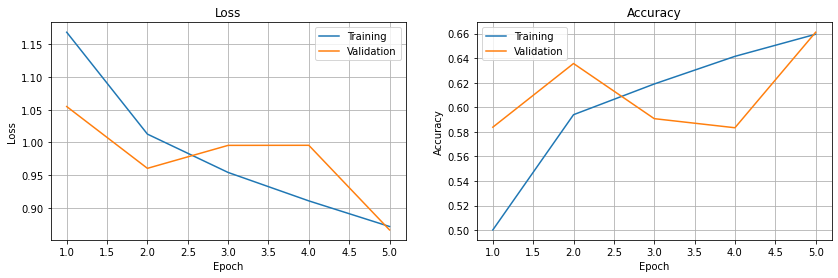

In [14]:
# plot results
import matplotlib.pyplot as plt
n_epochs = len(results['loss'])

plt.figure(figsize=[14,4])
plt.grid(True)
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), results['loss'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), results['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
model.load_weights('Nasnet_weights.h5')

In [16]:
predictions = model.evaluate(test_ds)

34/34 [==============================] - 76s 2s/step - loss: 0.9129 - accuracy: 0.6292


In [17]:
# make predictions on the unseen data
predictions = model.predict(test_ds)
predictions

array([[0.54249215, 0.26507345, 0.10775355, 0.08468086],
       [0.15265591, 0.26739612, 0.504325  , 0.07562302],
       [0.48266286, 0.17198928, 0.19200353, 0.1533443 ],
       ...,
       [0.02919996, 0.0202366 , 0.09593617, 0.8546273 ],
       [0.03873136, 0.07220921, 0.05896334, 0.8300961 ],
       [0.01051828, 0.00857752, 0.03194446, 0.94895977]], dtype=float32)

In [18]:
# save the index of the highest probability
predictions = predictions.argmax(axis=1)
predictions

array([0, 2, 0, ..., 3, 3, 3])

In [19]:
# get the actual values
test_images = list(test_ds.unbatch().as_numpy_iterator())
y_true = np.array([i[1] for i in test_images])
y_true = y_true.argmax(axis=1)
y_true

array([0, 0, 0, ..., 3, 3, 3])

In [20]:
# calculate f1_score
from sklearn.metrics import f1_score
f1_score(y_true,predictions,average='macro')

0.6234601697171587

In [21]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true,predictions)

array([[166,  41,  50,  14],
       [ 45,  99, 117,  10],
       [ 18,  17, 218,  18],
       [ 15,  13,  44, 199]])

The model misclassified **rhinos**. Let's see

In [22]:
import pandas as pd
comparison = pd.DataFrame({'actual':y_true,'predicted':predictions,
                           'same':y_true==predictions})
comparison.replace({0:'Buffalo',1:'Elephant',2:'Rhino',3:'Zebra'},inplace=True)
comparison[comparison.same==False]

actual predicted   same
1     Buffalo     Rhino  False
12    Buffalo     Rhino  False
17    Buffalo     Rhino  False
18    Buffalo     Rhino  False
21    Buffalo     Rhino  False
...       ...       ...    ...
1050    Zebra     Rhino  False
1052    Zebra     Rhino  False
1065    Zebra     Rhino  False
1072    Zebra     Rhino  False
1074    Zebra     Rhino  False

[402 rows x 3 columns]

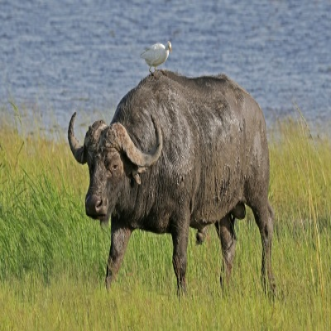

In [24]:
image.array_to_img(test_images[12][0])

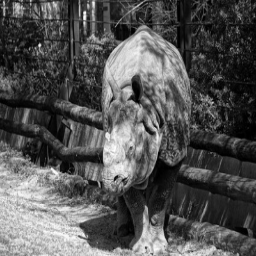

In [ ]:
image.array_to_img(test_images[633][0])

In [ ]:
# uncomment the below to save the model
'''import pickle
pickle.dump(model, open('efficientnetb7.pkl', 'wb'))'''

In [30]:
#Retrain attempt

base_model.trainable = True
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.Accuracy()],
)

epochs = 2
model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 331, 331, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 165, 165, 96  2592        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 165, 165, 96  384         ['stem_conv1[0][0]']             
                                )                                                             

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


ResourceExhaustedError: ignored

In [33]:
pip install pyyaml h5py


In [34]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [36]:
# uncomment the below to save the model
import pickle
pickle.dump(model, open('Nasnet.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://ea4d5cd0-98a0-4011-8474-11de15359407/assets
